##APRENDIZAJE NO SUPERVISADO 198
CRISTHIAN SEGURA IBARRA

Conjunto de datos de canciones

##IMPORTACION Y PREPROCESAMIENTO

In [ ]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split
# para aumentar datos en un dataset
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle


import sklearn as skl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/420/dataset labs/segundoParcial/SPP_train_5_folds.csv', delimiter=',')

In [ ]:
print(data)

          id  song_duration_ms  acousticness  danceability    energy  \
0      25525          160207.0      0.468952      0.558192  0.542314   
1      29945          175575.0      0.562466      0.837785  0.684599   
2      22765           66156.0      1.025163           NaN       NaN   
3       9738          194331.0      0.101652           NaN  0.811663   
4      25087          250925.0      0.676626      0.822191  0.413637   
...      ...               ...           ...           ...       ...   
19995  38107               NaN           NaN      0.652824  0.754717   
19996  25046          224982.0      0.700969      0.451393  0.764497   
19997  28334          235595.0      0.070360      0.720892  0.792667   
19998  25835          183743.0      0.304418           NaN  0.992989   
19999  21837          248965.0      0.326164      0.568383       NaN   

       instrumentalness   key  liveness   loudness  audio_mode  speechiness  \
0              0.004122   1.0       NaN        NaN      

In [ ]:
# Convertir todas las columnas a valores numéricos (en caso de error, convertir o eliminar las columnas no numéricas)
data = data.apply(pd.to_numeric, errors='coerce')

# Elimina las filas que contienen valores NaN
data.dropna(inplace=True)

# Mostrar un resumen estadístico de todas las columnas
print(data.describe())

                 id  song_duration_ms  acousticness  danceability  \
count   8573.000000       8573.000000   8573.000000   8573.000000   
mean   19995.884638     193940.419806      0.278083      0.572434   
std    11482.350145      45716.949288      0.297750      0.189880   
min        7.000000      43971.000000     -0.010766      0.043961   
25%    10017.000000     166642.000000      0.039448      0.426465   
50%    20157.000000     186913.000000      0.141965      0.610593   
75%    29867.000000     216130.000000      0.489873      0.718313   
max    39993.000000     465636.000000      1.041087      0.954945   

            energy  instrumentalness          key     liveness     loudness  \
count  8573.000000       8573.000000  8573.000000  8573.000000  8573.000000   
mean      0.685516          0.035363     4.976554     0.199754    -7.360714   
std       0.212654          0.148464     3.380903     0.151800     3.869952   
min      -0.001682         -0.004398     0.000000     0.030298

In [ ]:
print(data)

          id  song_duration_ms  acousticness  danceability    energy  \
8      35193          221480.0      0.068433      0.778958  0.646591   
10     22437          198893.0      0.683361      0.685158  0.443751   
11     26364          221604.0      0.370384      0.686288  0.765864   
13     31392          161170.0      0.965527      0.539505  0.411763   
17       788          216619.0      0.559052      0.355458  0.374701   
...      ...               ...           ...           ...       ...   
19990  25073          245654.0      0.595921      0.285711  0.398178   
19992  28551          220552.0      0.049426      0.678731  0.699500   
19993   3548          184767.0      0.033827      0.383742  0.672909   
19996  25046          224982.0      0.700969      0.451393  0.764497   
19997  28334          235595.0      0.070360      0.720892  0.792667   

       instrumentalness  key  liveness   loudness  audio_mode  speechiness  \
8              0.004032  0.0  0.160568  -6.007053        

##NORMALIZACION

In [ ]:
def  featureNormalize(X):
    #X_norm = X.copy()
    #mu = np.zeros(X.shape[1])
    #sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
data_norm, mu, sigma = featureNormalize(data)

In [ ]:
print(data_norm)

             id  song_duration_ms  acousticness  danceability    energy  \
8      1.323597          0.602428     -0.704158      1.087717 -0.183053   
10     0.212610          0.108338      1.361217      0.593692 -1.136961   
11     0.554633          0.605141      0.310011      0.599643  0.377858   
13     0.992548         -0.716853      2.308933     -0.173432 -1.287393   
17    -1.672916          0.496094      0.943695     -1.142768 -1.461685   
...         ...               ...           ...           ...       ...   
19990  0.442193          1.131235      1.067530     -1.510112 -1.351277   
19992  0.745110          0.582128     -0.767997      0.559846  0.065761   
19993 -1.432533         -0.200669     -0.820390     -0.993803 -0.059288   
19996  0.439841          0.679035      1.420356     -0.637499  0.371428   
19997  0.726210          0.911194     -0.697684      0.781900  0.503906   

       instrumentalness       key  liveness  loudness  audio_mode  \
8             -0.211042 -1.472

##GRAFICA DE LA SILUETA PARA DETERMINAR EL NUMERO DE CLUSTERS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

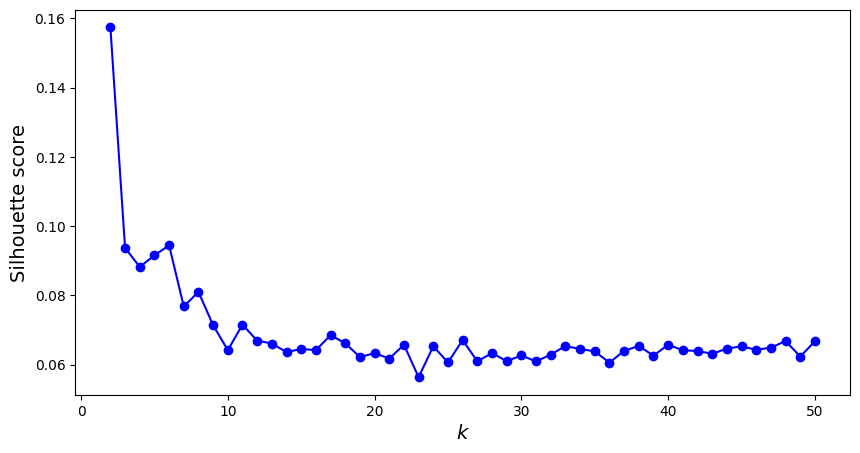

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Creamos una lista de modelos de KMeans ajustados para diferentes números de clusters (de 2 a 20)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_norm) for k in range(2, 51)]

# Calculamos los coeficientes de silueta para cada modelo KMeans
silhouette_scores = [silhouette_score(data_norm, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(10, 5))

# Graficar el coeficiente de silueta en función del número de clusters (de 2 a 20)
plt.plot(range(2, 51), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()


##SE CONSIDERA EL MAYOR VALOR DE SILUETA YA QUE INDICA UNA MEJOR AGRUPACION

In [ ]:
# Encontrar el índice del máximo coeficiente de silueta
max_index = np.argmax(silhouette_scores)

# Calcular el valor de k correspondiente al máximo coeficiente de silueta
mejor_K = max_index + 2

# Imprimir el valor de k que maximiza el coeficiente de silueta
print("El valor óptimo de k es:", mejor_K)

El valor óptimo de k es: 2


In [ ]:
from sklearn.cluster import KMeans

k = 2  # Números de clusters

# Instanciamos el modelo KMeans con el número de clusters k
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo KMeans a los datos y transformar los datos en distancias de cada punto a los centroides de los clusters
X_digits_dist = kmeans.fit_transform(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##OBTENCION DE LAS MAS REPRESENTATIVAS

In [ ]:
# Encontrar el índice del punto más cercano a cada centroide (cluster)
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los puntos representativos (centroides) de cada cluster
X_representative_digits = data_norm.values[idxs]

##SE CREA UN ARRAY DE LABELS SEGUN EL NUMERO DE CLUSTERS

In [ ]:
# Crear un array con los valores del 0 al 1
y_representative_digits = np.arange(2)

# Mostramos las etiquetas de las muestras representativas
print(y_representative_digits.shape)
print(y_representative_digits)

(2,)
[0 1]


#PROPAGACION DE LABELS

In [ ]:
# Crear un array vacío para almacenar las etiquetas propagadas
y_train_propagated = np.empty(len(data_norm))

# Iterar sobre cada cluster (i) generado por KMeans
for i in range(k):
    # Asignamos las etiquetas de los datos representativos del cluster (i) a todos los puntos del mismo cluster en data_norm
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [ ]:
print(y_train_propagated)

[1. 0. 1. ... 1. 1. 1.]


##ENTRENAMIENTO SOLO CON LOS MAS REPRESENTATIVOS Y TESTEO DE TODOS LOS DATOS CON DICHO ENTRENAMIENTO

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear un clasificador de regresión logística
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)

# Entrenar el clasificador con los datos representativos y sus etiquetas
%time log_reg2.fit(X_representative_digits, y_representative_digits)

# Calcular el puntaje de precisión del clasificador en el conjunto de prueba
log_reg2.score(data_norm,y_train_propagated )

CPU times: user 6.21 ms, sys: 893 µs, total: 7.1 ms
Wall time: 19.9 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.930712702671177

##ENTRENAMIENTO CON TODOS LOS DATOS Y TESTEO DEL MISMO

In [ ]:
# Creamos un clasificador de regresión logística con las etiquetas propagadas
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
%time log_reg3.fit(data_norm, y_train_propagated)
log_reg3.score(data_norm, y_train_propagated)

CPU times: user 30 ms, sys: 15 ms, total: 45 ms
Wall time: 29.2 ms


0.9982503207745247